In [1]:
import numpy as np
import json

open_odeint_benchmark = lambda tol_exp: json.load(open(f"odeint_gpu_benchmarks/tol_{tol_exp}.json"))
def open_perturbative_benchmark(method, cheb, exp_order, n_steps):
    return json.load(open(f"perturbative_gpu_benchmarks/{method}_{cheb}_{exp_order}_{n_steps}.json"))

In [2]:
dyson_distance_list = []
dyson_sim_time_list = []
dyson_grad_time_list = []
dyson_labels = []

for cheb in [0, 1, 2]:
    for exp_order in [2, 3, 4, 5]:
        dyson_labels.append((cheb, exp_order))
        dyson_distance = []
        dyson_sim_time = []
        dyson_grad_time = []
        for n_steps in [10000, 20000, 30000, 40000, 50000]:
            dyson_dict = open_perturbative_benchmark("dyson", cheb, exp_order, n_steps)
            dyson_distance.append(dyson_dict["average_distance"])
            dyson_sim_time.append(dyson_dict["sim_time"])
            dyson_grad_time.append(dyson_dict["grad_time"])
        
        dyson_distance_list.append(dyson_distance)
        dyson_sim_time_list.append(dyson_sim_time)
        dyson_grad_time_list.append(dyson_grad_time)

In [3]:
magnus_distance_list = []
magnus_sim_time_list = []
magnus_grad_time_list = []
magnus_labels = []

for cheb in [0, 1, 2]:
    for exp_order in [2, 3, 4, 5]:
        magnus_labels.append((cheb, exp_order))
        magnus_distance = []
        magnus_sim_time = []
        magnus_grad_time = []
        for n_steps in [10000, 20000, 30000, 40000, 50000]:
            magnus_dict = open_perturbative_benchmark("magnus", cheb, exp_order, n_steps)
            magnus_distance.append(magnus_dict["average_distance"])
            magnus_sim_time.append(magnus_dict["sim_time"])
            magnus_grad_time.append(magnus_dict["grad_time"])
        
        magnus_distance_list.append(magnus_distance)
        magnus_sim_time_list.append(magnus_sim_time)
        magnus_grad_time_list.append(magnus_grad_time)

In [4]:
odeint_distance = []
odeint_sim_time = []
odeint_grad_time = []

for tol_exp in [7, 8, 9, 10, 11, 12, 13]:
    odeint_dict = open_odeint_benchmark(tol_exp)
    odeint_distance.append(odeint_dict["average_distance"])
    odeint_sim_time.append(odeint_dict["sim_time"])
    odeint_grad_time.append(odeint_dict["grad_time"])

## Full plot

Option 1:
- Alternating color first, shape second.

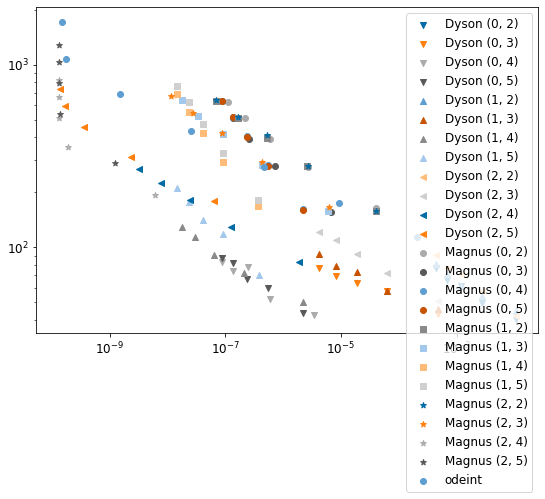

In [27]:
from matplotlib import pyplot as plt

plt.style.use('tableau-colorblind10')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize = (9, 6))

ax.set_xscale("log")
ax.set_yscale("log")

#ax.set_ylim(top=3e3, bottom=3e1)
dyson_markers=["v", "^", "<"]
for k in range(3):
    for label, distance, sim_time, color in zip(dyson_labels[4*k:4*(k+1)], dyson_distance_list[4*k:4*(k+1)], dyson_sim_time_list[4*k:4*(k+1)], colors[1:5]):
        ax.scatter(distance, sim_time, label=f"Dyson {label}", marker=dyson_markers[k])
magnus_markers = ["o", "s", "*"]
for k in range(3):
    for label, distance, sim_time, color in zip(magnus_labels[4*k:4*(k+1)], magnus_distance_list[4*k:4*(k+1)], magnus_sim_time_list[4*k:4*(k+1)], colors[1:5]):
        ax.scatter(distance, sim_time, label=f"Magnus {label}", marker=magnus_markers[k])

ax.scatter(odeint_distance, odeint_sim_time, label="odeint", marker='o')
ax.legend()

Option 2:
- Alternating shape first, color second.
- I think I prefer this. It still looks cluttered, so I want to play around with it, but it's hard to fully declutter given the number of different types of points.
- Need to .

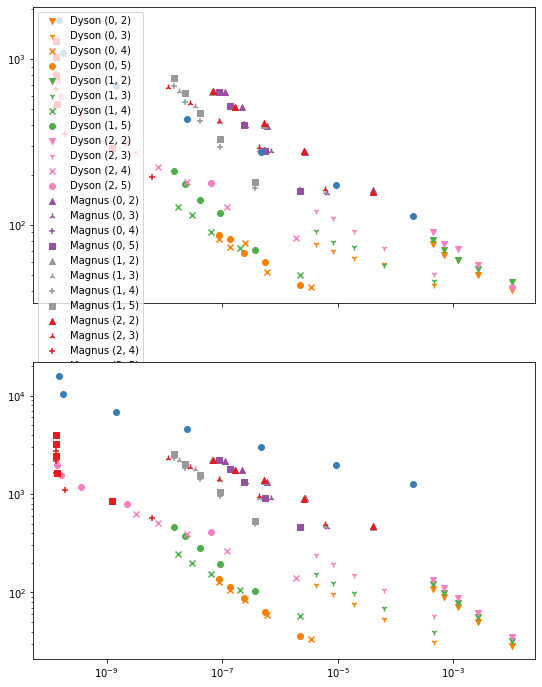

In [6]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize = (9, 12))

ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

#ax.set_ylim(top=3e3, bottom=3e1)
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', '#dede00']
dyson_markers=["v", "^", "<" ,">"]
dyson_markers=["1", "2", "3" ,"4"]
dyson_markers=["v", "1", "x" ,"o"]
magnus_markers = ["o", "s", "*", "P"]
magnus_markers = ["^", "2", "+", "s"]

for k in range(3):
    for label, distance, sim_time, marker in zip(dyson_labels[4*k:4*(k+1)], dyson_distance_list[4*k:4*(k+1)], dyson_sim_time_list[4*k:4*(k+1)], dyson_markers):
        ax1.scatter(distance, sim_time, label=f"Dyson {label}", color=colors[k+1], marker=marker)
for k in range(3):
    for label, distance, sim_time, marker in zip(magnus_labels[4*k:4*(k+1)], magnus_distance_list[4*k:4*(k+1)], magnus_sim_time_list[4*k:4*(k+1)], magnus_markers):
        ax1.scatter(distance, sim_time, label=f"Magnus {label}", color=colors[k+5], marker=marker)
ax1.scatter(odeint_distance, odeint_sim_time, label="odeint", color=colors[0])
ax1.legend()

for k in range(3):
    for label, distance, sim_time, marker in zip(dyson_labels[4*k:4*(k+1)], dyson_distance_list[4*k:4*(k+1)], dyson_grad_time_list[4*k:4*(k+1)], dyson_markers):
        ax2.scatter(distance, sim_time, label=f"Dyson {label}", color=colors[k+1], marker=marker)
for k in range(3):
    for label, distance, sim_time, marker in zip(magnus_labels[4*k:4*(k+1)], magnus_distance_list[4*k:4*(k+1)], magnus_grad_time_list[4*k:4*(k+1)], magnus_markers):
        ax2.scatter(distance, sim_time, label=f"Magnus {label}", color=colors[k+5], marker=marker)
ax2.scatter(odeint_distance, odeint_grad_time, label="odeint", color=colors[0])

Option 3
- The original plots in the paper actually separate Dyson/Magnus.

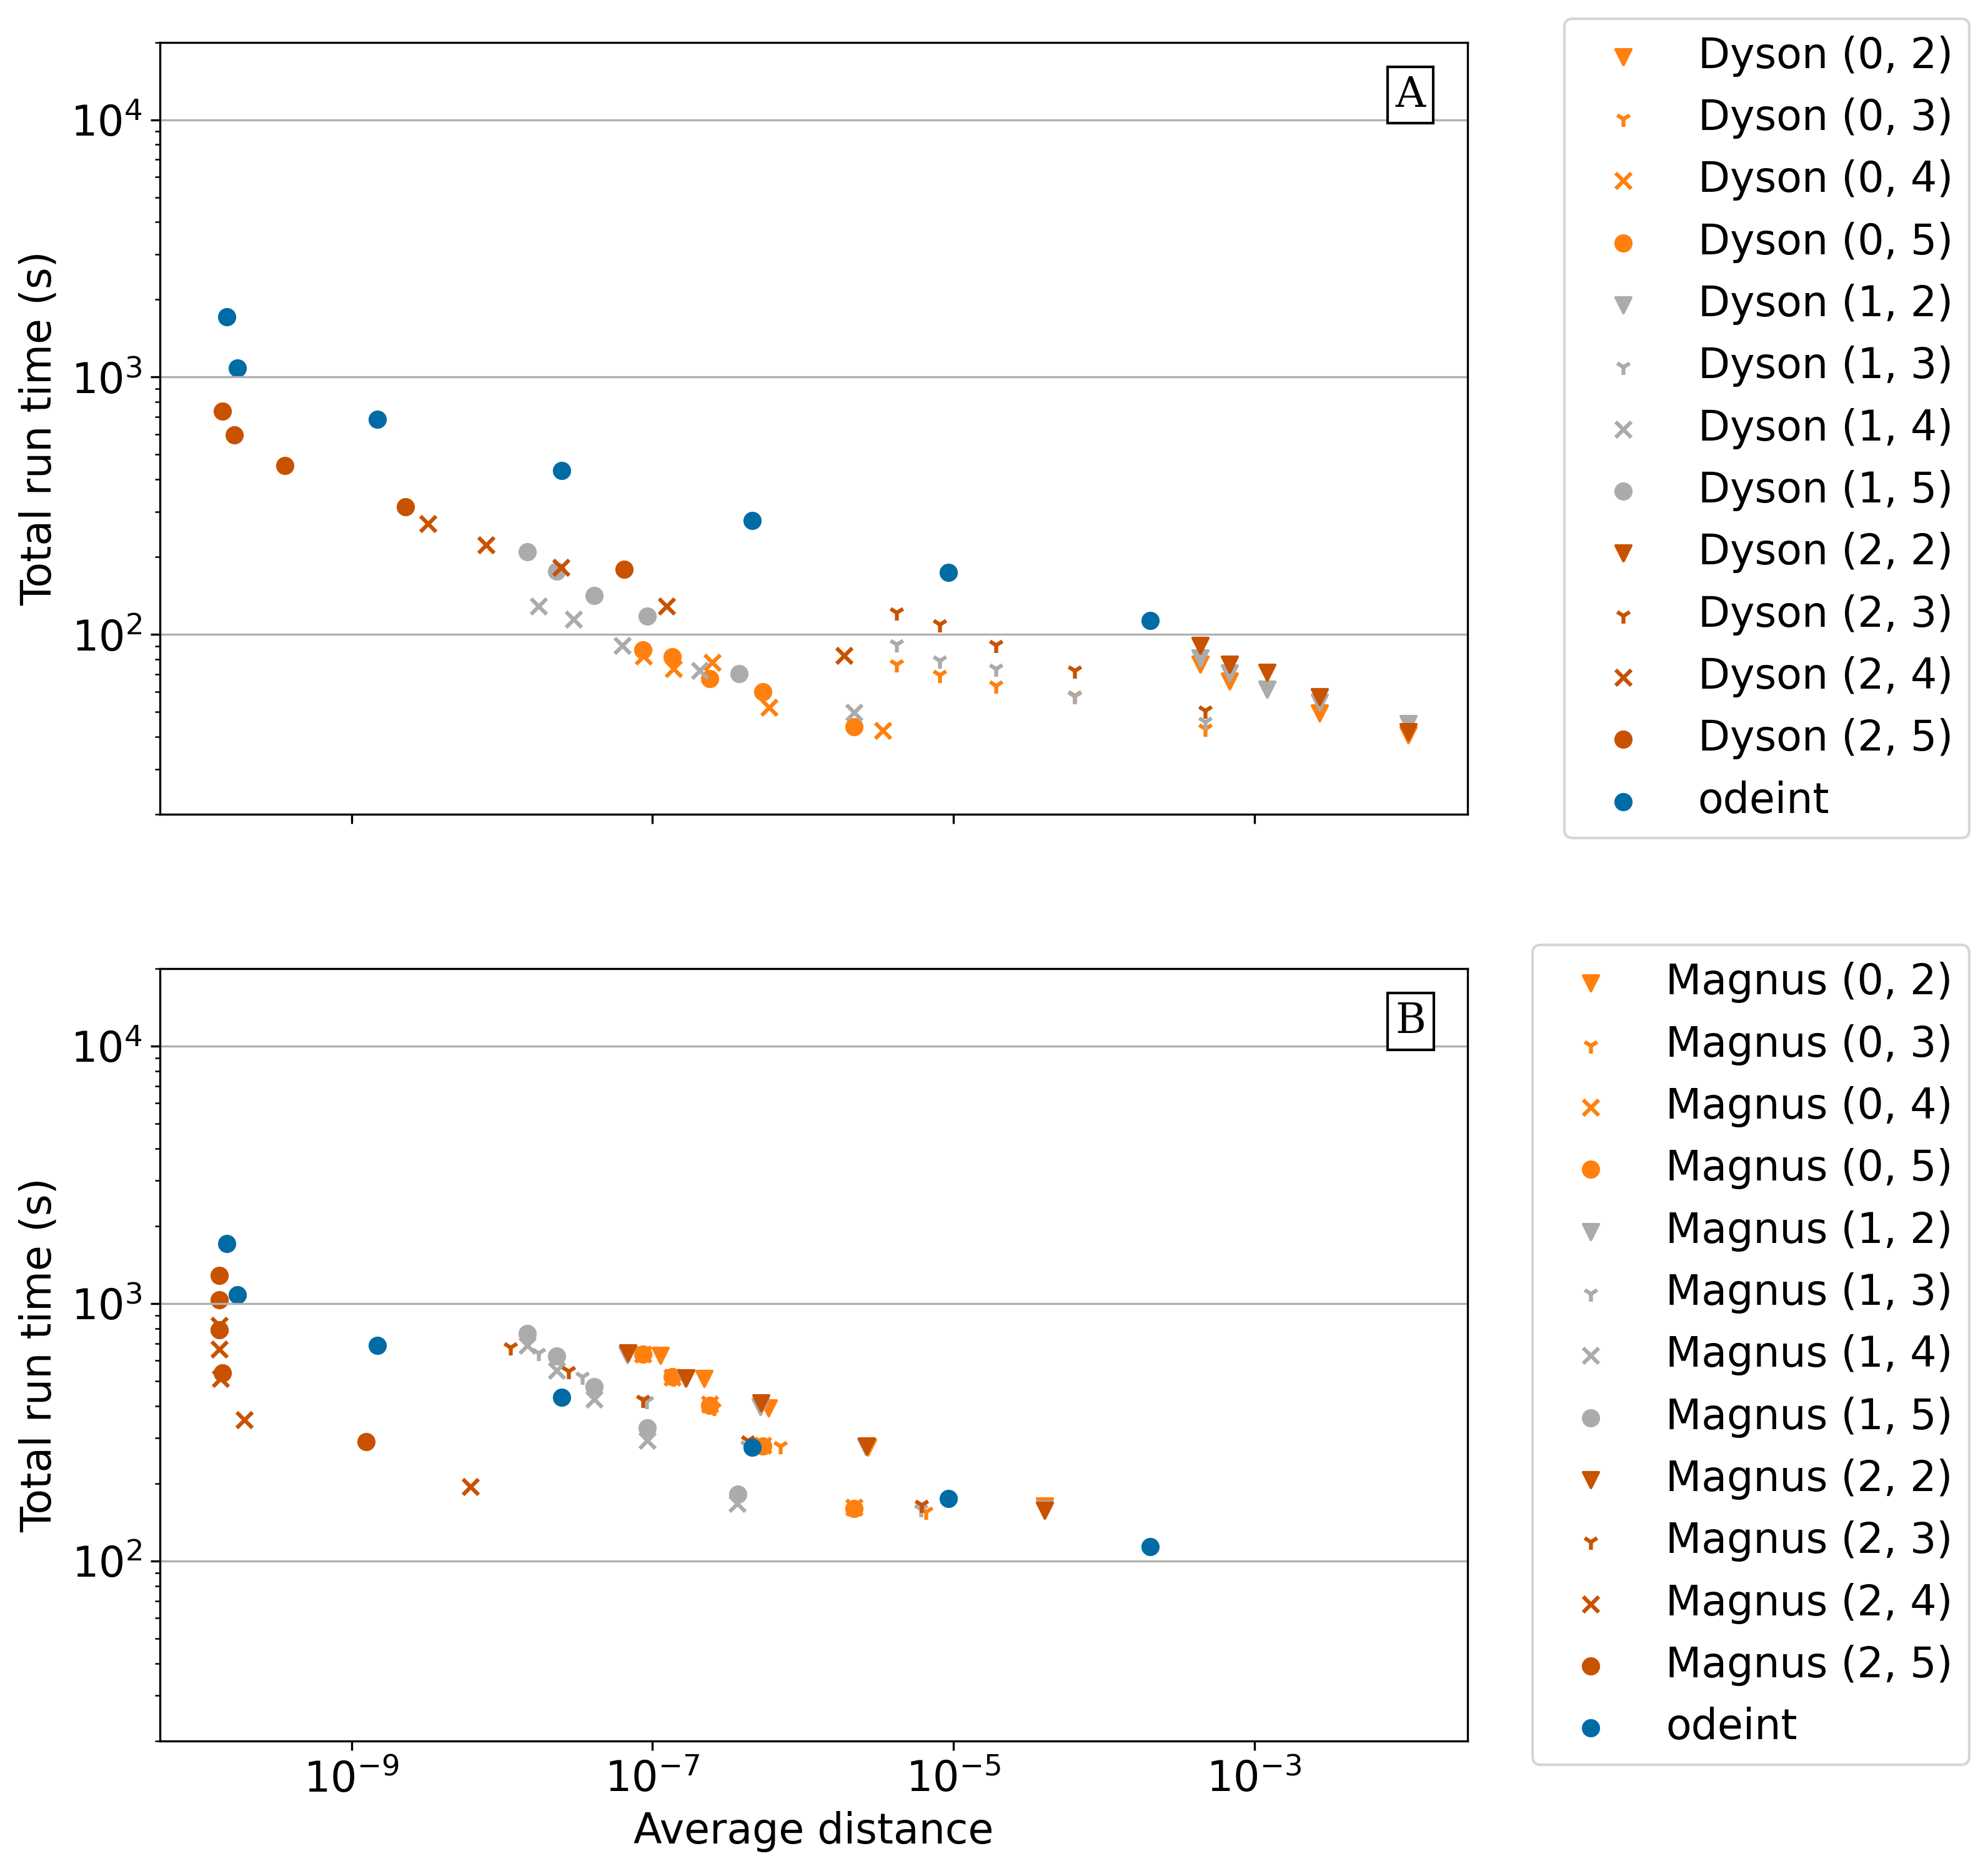

In [181]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize = (9, 12))

ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.set_ylim(top=2e4, bottom=2e1)
ax2.set_ylim(top=2e4, bottom=2e1)

plt.style.use('tableau-colorblind10')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
chosen_colors = [colors[0], colors[1], colors[2], colors[5]]
dyson_markers=["v", "1", "x" ,"o"]
magnus_markers=dyson_markers

for k in range(3):
    for label, distance, sim_time, marker in zip(dyson_labels[4*k:4*(k+1)], dyson_distance_list[4*k:4*(k+1)], dyson_sim_time_list[4*k:4*(k+1)], dyson_markers):
        ax1.scatter(distance, sim_time, label=f"Dyson {label}", color=chosen_colors[k+1], marker=marker)
for k in range(3):
    for label, distance, sim_time, marker in zip(magnus_labels[4*k:4*(k+1)], magnus_distance_list[4*k:4*(k+1)], magnus_sim_time_list[4*k:4*(k+1)], magnus_markers):
        ax2.scatter(distance, sim_time, label=f"Magnus {label}", color=chosen_colors[k+1], marker=marker)
ax1.scatter(odeint_distance, odeint_sim_time, label="odeint", color=colors[0])
ax2.scatter(odeint_distance, odeint_sim_time, label="odeint", color=colors[0])
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.925, 0.975, 'A', transform=ax1.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax2.text(0.925, 0.975, 'B', transform=ax2.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax1.grid(axis='y')
ax2.grid(axis='y')
ax1.set_ylabel("Total run time (s)")
ax2.set_ylabel("Total run time (s)")
ax2.set_xlabel("Average distance")
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

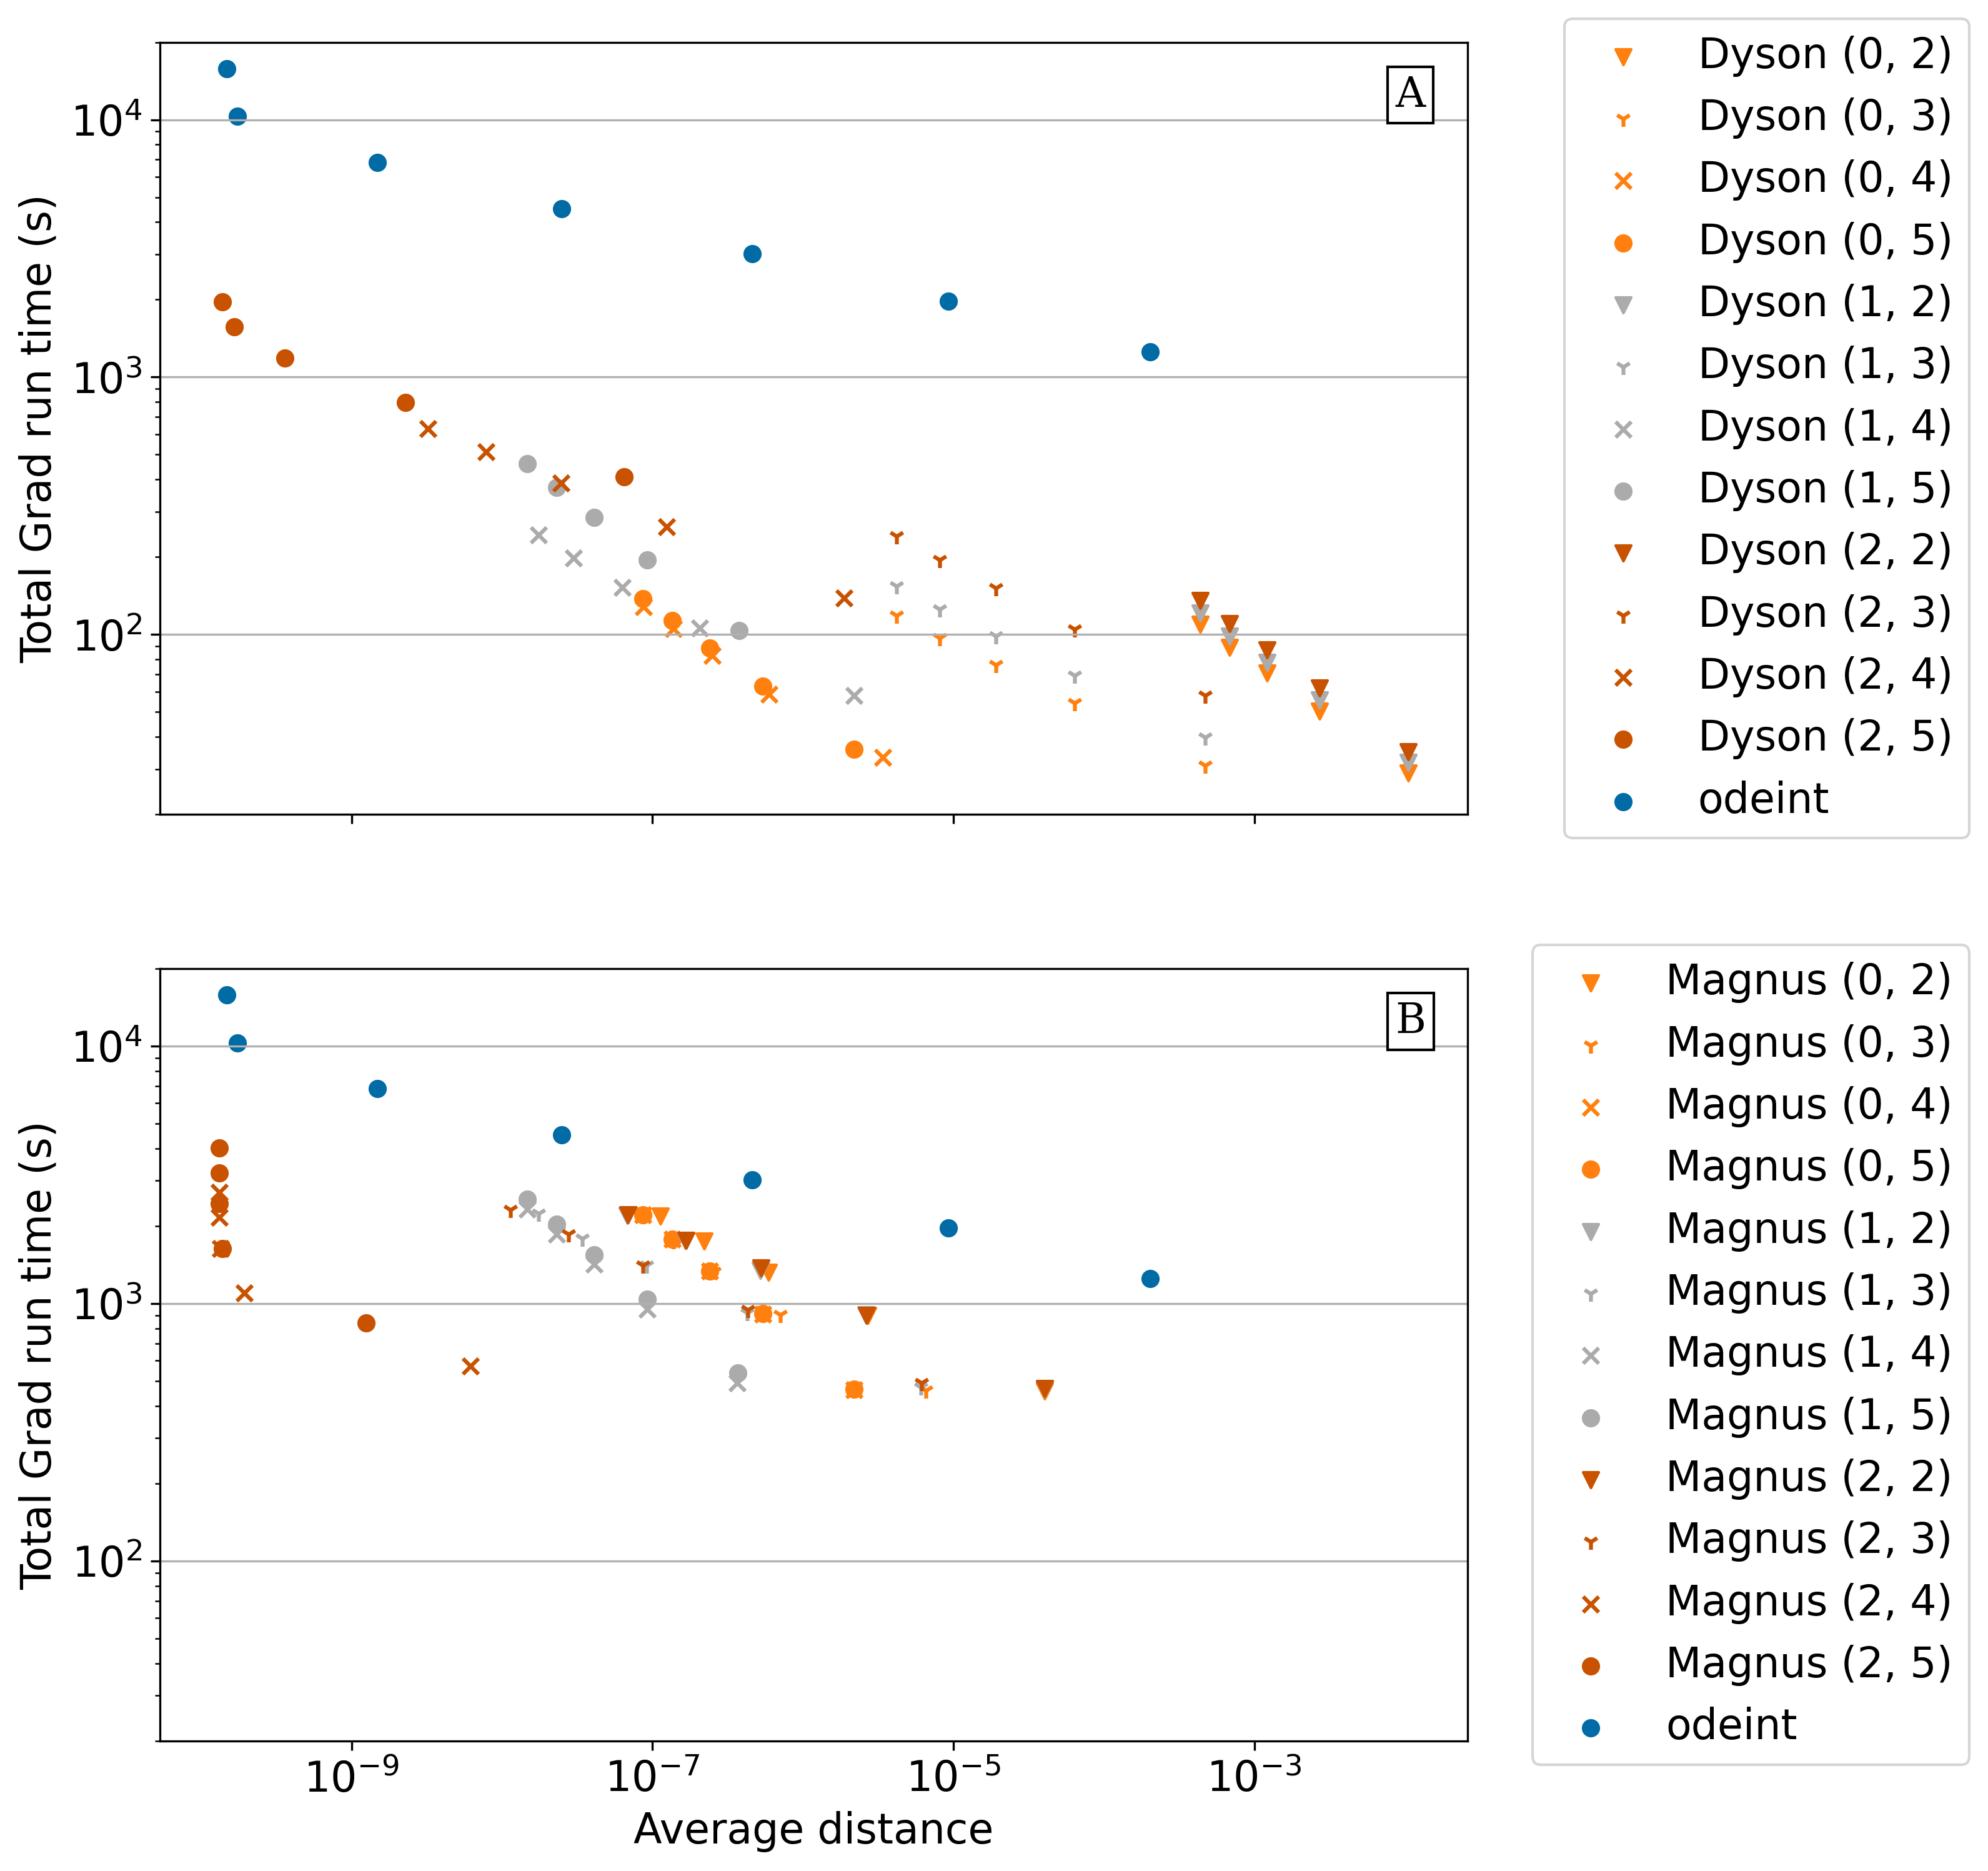

In [182]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize = (9, 12))

ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.set_ylim(top=2e4, bottom=2e1)
ax2.set_ylim(top=2e4, bottom=2e1)

plt.style.use('tableau-colorblind10')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
chosen_colors = [colors[0], colors[1], colors[2], colors[5]]
dyson_markers=["v", "1", "x" ,"o"]
magnus_markers=dyson_markers

for k in range(3):
    for label, distance, sim_time, marker in zip(dyson_labels[4*k:4*(k+1)], dyson_distance_list[4*k:4*(k+1)], dyson_grad_time_list[4*k:4*(k+1)], dyson_markers):
        ax1.scatter(distance, sim_time, label=f"Dyson {label}", color=chosen_colors[k+1], marker=marker)
for k in range(3):
    for label, distance, sim_time, marker in zip(magnus_labels[4*k:4*(k+1)], magnus_distance_list[4*k:4*(k+1)], magnus_grad_time_list[4*k:4*(k+1)], magnus_markers):
        ax2.scatter(distance, sim_time, label=f"Magnus {label}", color=chosen_colors[k+1], marker=marker)
ax1.scatter(odeint_distance, odeint_grad_time, label="odeint", color=colors[0])
ax2.scatter(odeint_distance, odeint_grad_time, label="odeint", color=colors[0])
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.925, 0.975, 'A', transform=ax1.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax2.text(0.925, 0.975, 'B', transform=ax2.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax1.grid(axis='y')
ax2.grid(axis='y')
ax1.set_ylabel("Total Grad run time (s)")
ax2.set_ylabel("Total Grad run time (s)")
ax2.set_xlabel("Average distance")
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

## Select comparison

Reproducing Fig 6

In [9]:
reduced_dyson_labels = [(0, 2), (0, 3), (0, 4), (1, 4), (2, 5)]
reduced_magnus_labels = [(1, 4), (2, 2), (2, 4), (2, 5)]

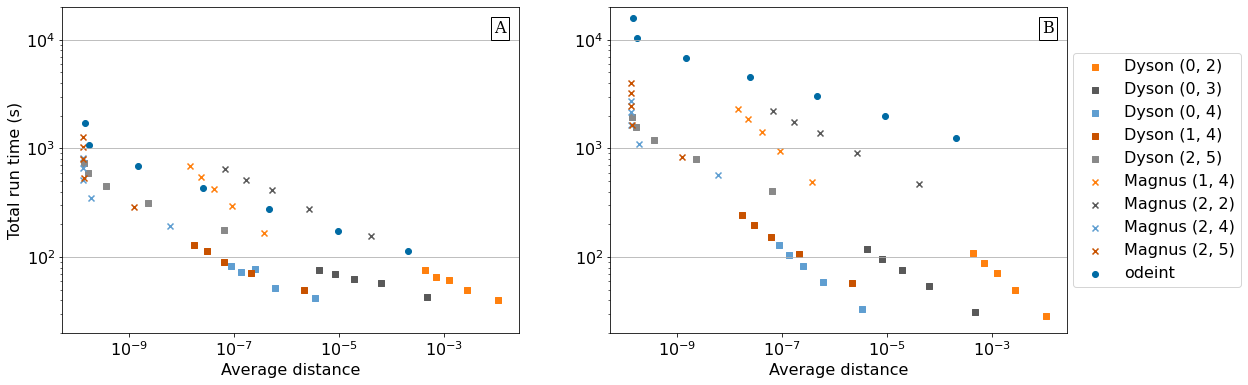

In [128]:
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms

#fig, axes = plt.subplot_mosaic([["A", "B"]], sharex=True, figsize = (18, 6))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (18, 6))

#ax1 = axes["A"]
#ax2=axes["B"]
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.set_ylim(top=2e4, bottom=2e1)
ax2.set_ylim(top=2e4, bottom=2e1)

plt.style.use('tableau-colorblind10')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = colors[:2] + colors[3:]

dyson_markers=["v", "1", "x" ,"s"]
magnus_markers=dyson_markers

for label_idx, label in enumerate(reduced_dyson_labels):
    distance = dyson_distance_list[dyson_labels.index(label)]
    sim_time = dyson_sim_time_list[dyson_labels.index(label)]
    ax1.scatter(distance, sim_time, label=f"Dyson {label}", color=colors[label_idx+1], marker="s")
for label_idx, label in enumerate(reduced_magnus_labels):
    distance = magnus_distance_list[magnus_labels.index(label)]
    sim_time = magnus_sim_time_list[magnus_labels.index(label)]
    ax1.scatter(distance, sim_time, label=f"Magnus {label}", color=colors[label_idx+1], marker="x")  
    
for label_idx, label in enumerate(reduced_dyson_labels):
    distance = dyson_distance_list[dyson_labels.index(label)]
    grad_time = dyson_grad_time_list[dyson_labels.index(label)]
    ax2.scatter(distance, grad_time, label=f"Dyson {label}", color=colors[label_idx+1], marker="s")
for label_idx, label in enumerate(reduced_magnus_labels):
    distance = magnus_distance_list[magnus_labels.index(label)]
    grad_time = magnus_grad_time_list[magnus_labels.index(label)]
    ax2.scatter(distance, grad_time, label=f"Magnus {label}", color=colors[label_idx+1], marker="x")

ax1.scatter(odeint_distance, odeint_sim_time, label="odeint", marker="o", color=colors[0])
ax2.scatter(odeint_distance, odeint_grad_time, label="odeint", marker="o", color=colors[0])

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.925, 0.975, 'A', transform=ax1.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax2.text(0.925, 0.975, 'B', transform=ax2.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax1.grid(axis='y')
ax2.grid(axis='y')
ax1.set_ylabel("Total run time (s)")
ax1.set_xlabel("Average distance")
ax2.set_xlabel("Average distance")
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

## Speedup plots

In [66]:
dyson_distance = np.array(dyson_distance_list).flatten()
dyson_sim_time = np.array(dyson_sim_time_list).flatten()
dyson_grad_time = np.array(dyson_grad_time_list).flatten()

magnus_distance = np.array(magnus_distance_list).flatten()
magnus_sim_time = np.array(magnus_sim_time_list).flatten()
magnus_grad_time = np.array(magnus_grad_time_list).flatten()

In [67]:
best_dyson_distance = []
best_dyson_sim_time = []
best_dyson_grad_time = []

for distance, sim_time, grad_time in zip(dyson_distance, dyson_sim_time, dyson_grad_time):
    incomparable = True
    for idx, (best_distance, best_sim_time) in enumerate(zip(best_dyson_distance, best_dyson_sim_time)):
        # if it's full better than an existing entry, overwrite
        if distance < best_distance and sim_time < best_sim_time:
            best_dyson_distance[idx] = distance
            best_dyson_sim_time[idx] = sim_time
            best_dyson_grad_time[idx] = grad_time
            incomparable = False
        elif best_distance <= distance and best_sim_time <= sim_time:
            incomparable=False
        
    if incomparable:
        best_dyson_distance.append(distance)
        best_dyson_sim_time.append(sim_time)
        best_dyson_grad_time.append(grad_time)

In [68]:
best_magnus_distance = []
best_magnus_sim_time = []
best_magnus_grad_time = []

for distance, sim_time, grad_time in zip(magnus_distance, magnus_sim_time, magnus_grad_time):
    incomparable = True
    for idx, (best_distance, best_sim_time) in enumerate(zip(best_magnus_distance, best_magnus_sim_time)):
        # if it's full better than an existing entry, overwrite
        if distance < best_distance and sim_time < best_sim_time:
            best_magnus_distance[idx] = distance
            best_magnus_sim_time[idx] = sim_time
            best_magnus_grad_time[idx] = grad_time
            incomparable = False
        elif best_distance <= distance and best_sim_time <= sim_time:
            incomparable=False
        
    if incomparable:
        best_magnus_distance.append(distance)
        best_magnus_sim_time.append(sim_time)
        best_magnus_grad_time.append(grad_time)

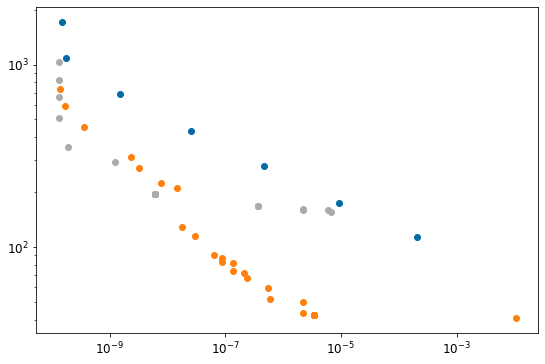

In [69]:
fig, ax = plt.subplots(figsize = (9, 6))

ax.set_xscale("log")
ax.set_yscale("log")

ax.scatter(odeint_distance, odeint_sim_time)
ax.scatter(best_dyson_distance, best_dyson_sim_time)
ax.scatter(best_magnus_distance, best_magnus_sim_time)

In [70]:
best_pert_distance = []
best_pert_sim_time = []
best_pert_grad_time = []

pert_distance = best_magnus_distance + best_dyson_distance
pert_sim_time = best_magnus_sim_time + best_dyson_sim_time
pert_grad_time = best_magnus_grad_time + best_dyson_grad_time

for distance, sim_time, grad_time in zip(pert_distance, pert_sim_time, pert_grad_time):
    incomparable = True
    for idx, (best_distance, best_sim_time) in enumerate(zip(best_pert_distance, best_pert_sim_time)):
        # if it's full better than an existing entry, overwrite
        if distance < best_distance and sim_time < best_sim_time:
            best_pert_distance[idx] = distance
            best_pert_sim_time[idx] = sim_time
            best_pert_grad_time[idx] = grad_time
            incomparable = False
        elif best_distance <= distance and best_sim_time <= sim_time:
            incomparable=False
        
    if incomparable:
        best_pert_distance.append(distance)
        best_pert_sim_time.append(sim_time)
        best_pert_grad_time.append(grad_time)

In [71]:
speedup_distance = []
speedup_sim_time = []
speedup_grad_time = []

for distance, sim_time in zip(odeint_distance, odeint_sim_time):
    speedup_pert_distance = None
    speedup_pert_sim_time = None
    speedup_pert_grad_time = None
    for pert_dist, pert_sim_time, pert_grad_time in zip(best_pert_distance, best_pert_sim_time, best_pert_grad_time):
        if pert_dist < distance:
            if speedup_pert_distance is None or pert_sim_time < speedup_pert_sim_time:
                speedup_pert_distance = pert_dist
                speedup_pert_sim_time = pert_sim_time
                speedup_pert_grad_time = pert_grad_time
    
    speedup_distance.append(speedup_pert_distance)
    speedup_sim_time.append(speedup_pert_sim_time)
    speedup_grad_time.append(speedup_pert_grad_time)
                

Text(0, 0.5, 'Grad Perturbative Speedup')

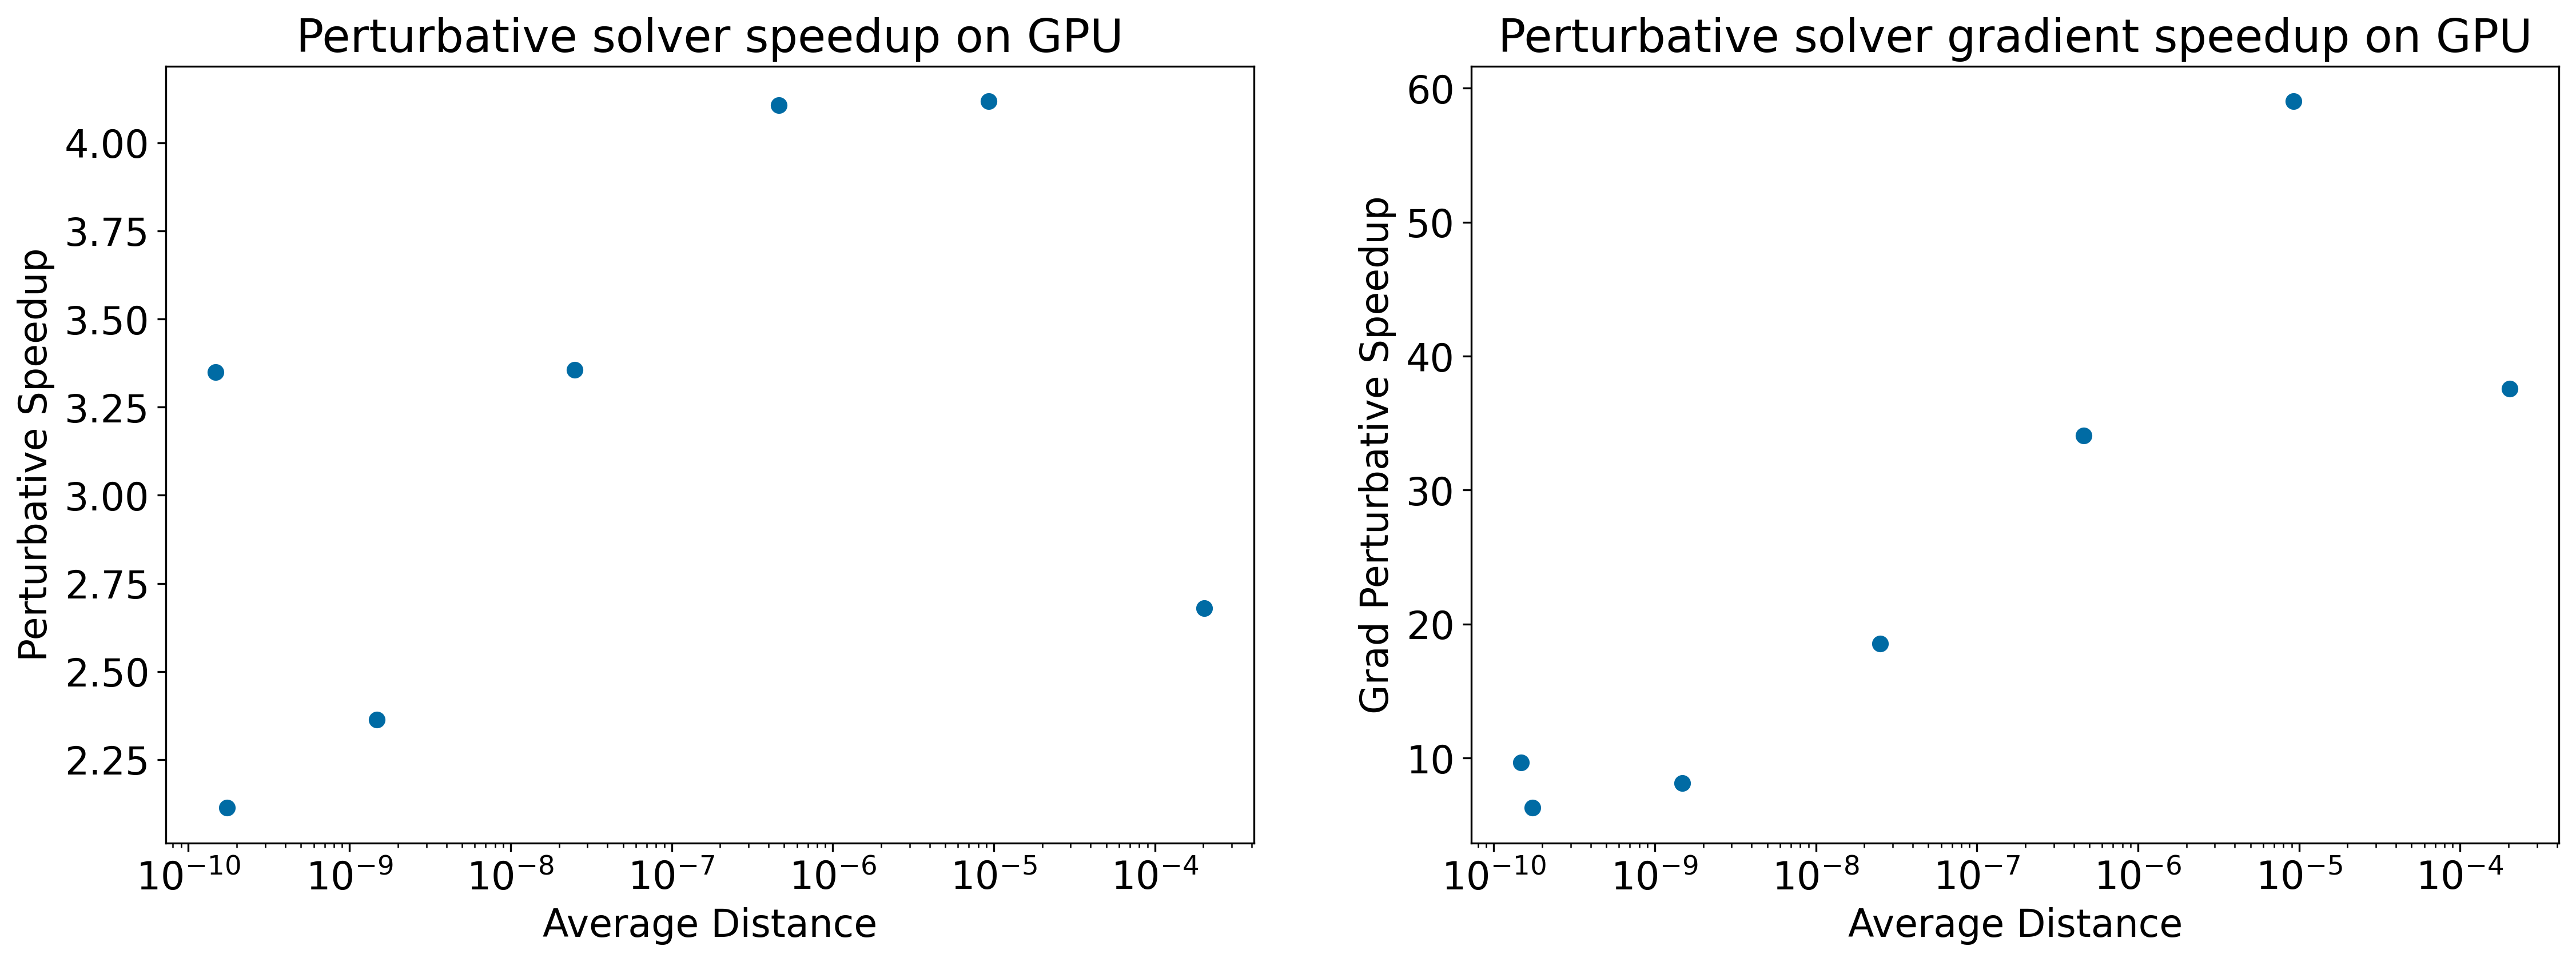

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (18, 6))

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.scatter(odeint_distance, np.array(odeint_sim_time)/np.array(speedup_sim_time))
ax1.set_title("Perturbative solver speedup on GPU")
ax1.set_xlabel("Average Distance")
ax1.set_ylabel("Perturbative Speedup")
ax2.scatter(odeint_distance, np.array(odeint_grad_time)/np.array(speedup_grad_time))
ax2.set_title("Perturbative solver gradient speedup on GPU")
ax2.set_xlabel("Average Distance")
ax2.set_ylabel("Grad Perturbative Speedup")

## Num terms v distance

In [18]:
from math import factorial

def choose(n, k):
    # n choose k:
    return factorial(n) / (factorial(k) * factorial(n - k))


def term_count(cheb_order, exp_order):
    return int(choose(((4 * (cheb_order + 1)) + exp_order), exp_order) - 1)

In [19]:
term_counts = [term_count(*x) for x in dyson_labels]
term_counts_sorted = sorted(term_counts)

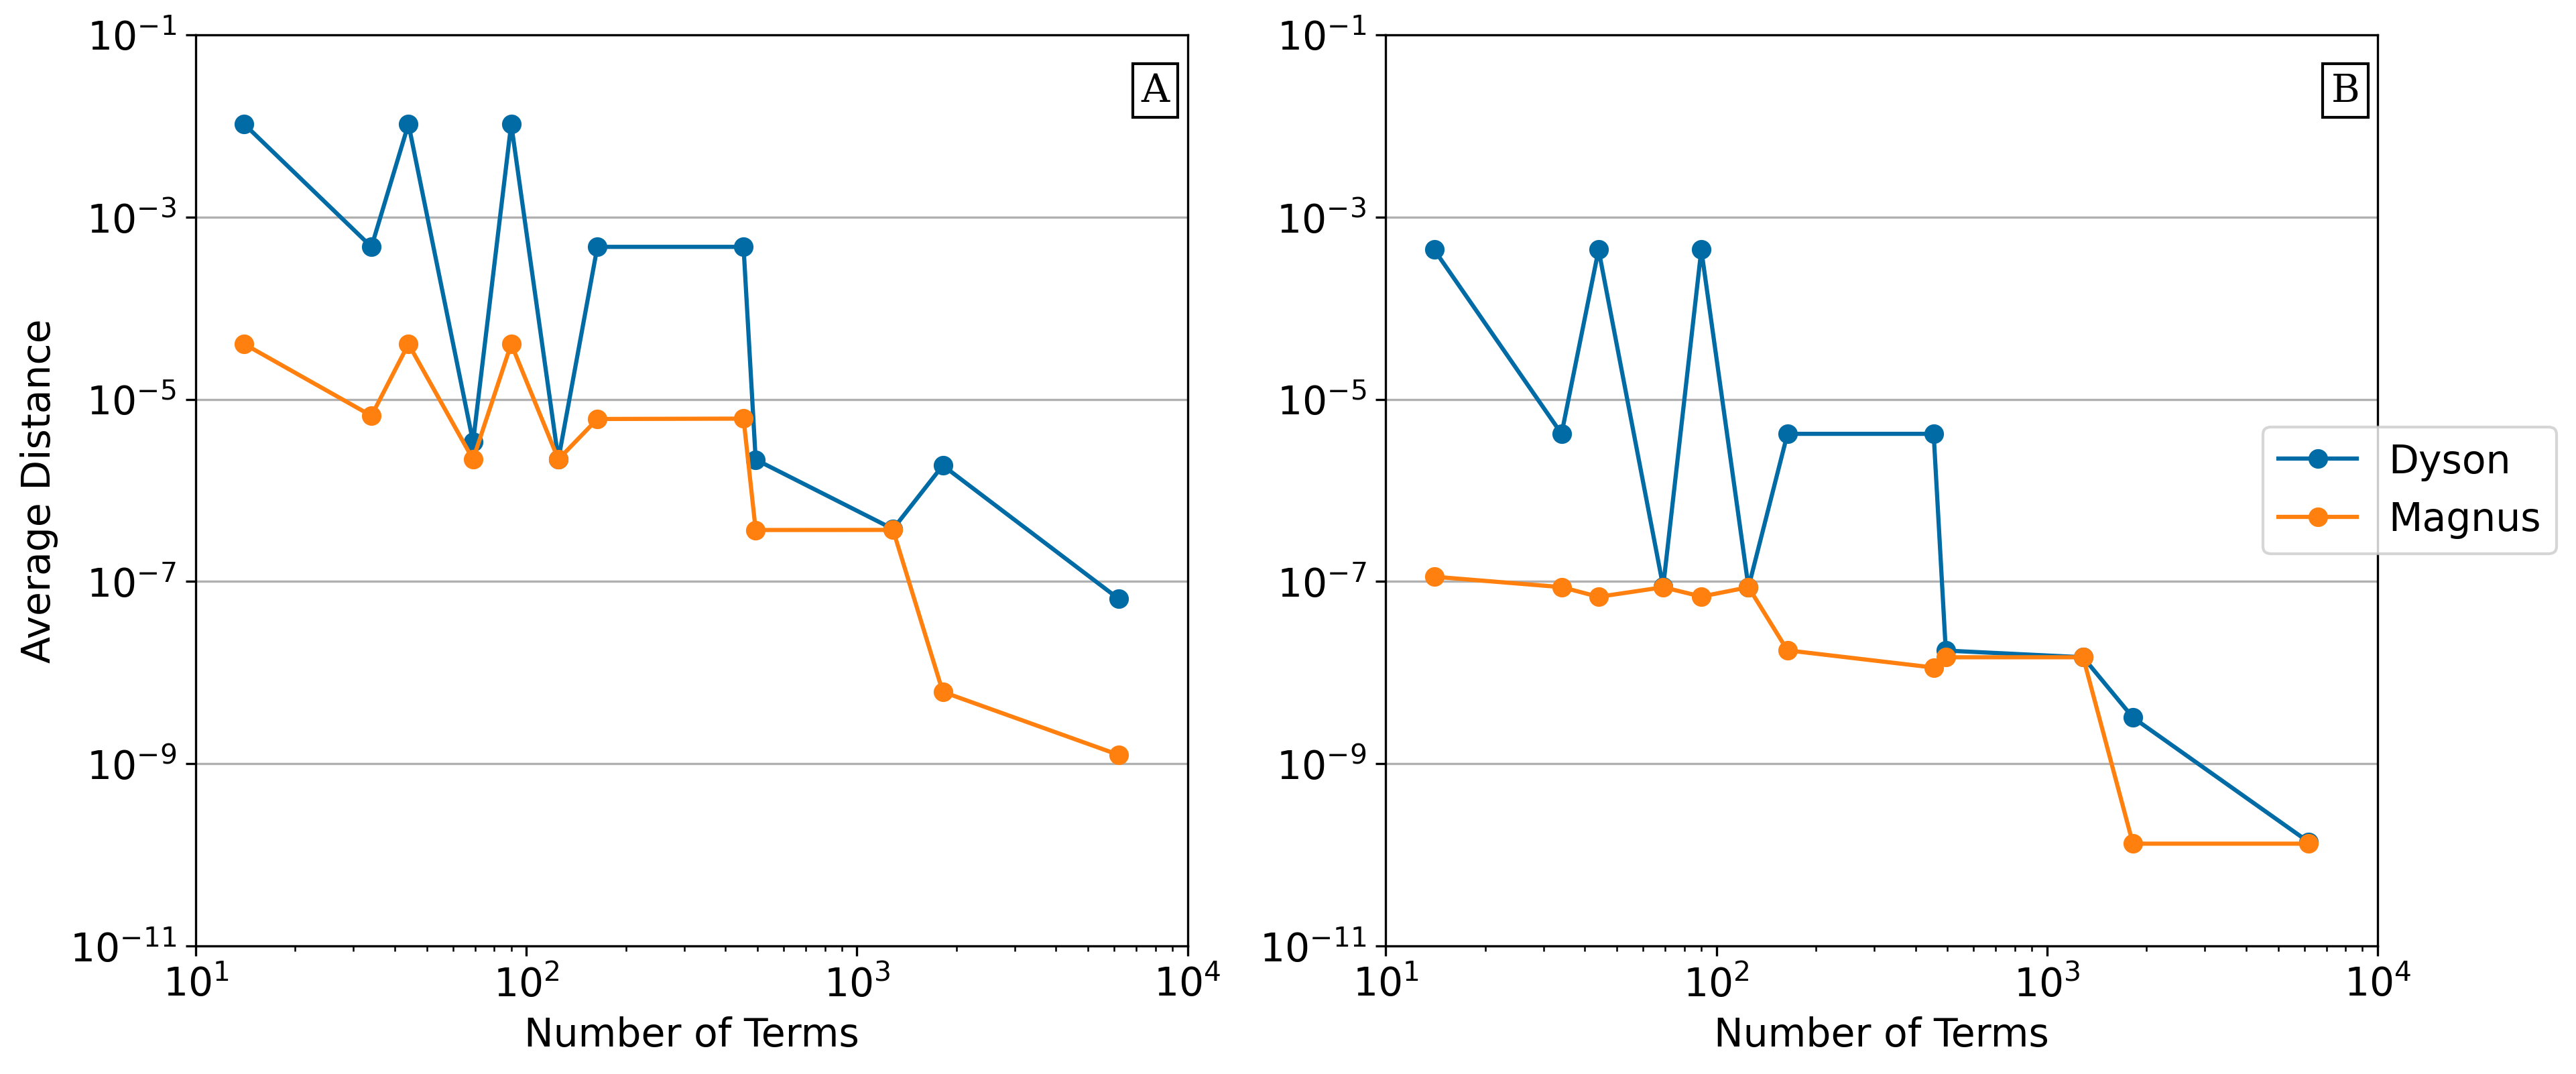

In [150]:
plt.style.use('tableau-colorblind10')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

dyson_term_distances_1 = [dyson_distance_list[term_counts.index(x)][0] for x in term_counts_sorted]
magnus_term_distances_1 = [magnus_distance_list[term_counts.index(x)][0] for x in term_counts_sorted]
dyson_term_distances_5 = [dyson_distance_list[term_counts.index(x)][-1] for x in term_counts_sorted]
magnus_term_distances_5 = [magnus_distance_list[term_counts.index(x)][-1] for x in term_counts_sorted]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (14, 6))

ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.set_ylim(top=1e-1, bottom=1e-11)
ax2.set_ylim(top=1e-1, bottom=1e-11)
ax1.set_xlim(left=1e1, right=1e4)
ax2.set_xlim(left=1e1, right=1e4)

ax1.set_xlabel("Number of Terms")
ax2.set_xlabel("Number of Terms")
ax1.set_ylabel("Average Distance")

ax1.grid(axis='y')
ax2.grid(axis='y')

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.925, 0.975, 'A', transform=ax1.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))
ax2.text(0.925, 0.975, 'B', transform=ax2.transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='1.0', edgecolor='0.', pad=3.0))

ax1.plot(term_counts_sorted, dyson_term_distances_1, marker="o")
ax1.plot(term_counts_sorted, magnus_term_distances_1, marker="o")
ax2.plot(term_counts_sorted, dyson_term_distances_5, marker="o", label="Dyson")
ax2.plot(term_counts_sorted, magnus_term_distances_5, marker="o", label="Magnus")
ax2.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

In [21]:
term_counts

[14, 34, 69, 125, 44, 164, 494, 1286, 90, 454, 1819, 6187]